Vitória Rodrigues Pinto Borelli Figueiredo - RA: 800203



---

# **Trabalho 3 - Inteligência Artificial**
**Aprendizado de Máquina Supervisionado**
--

---

##Introdução

Este trabalho consiste na execução e validação do algoritmo de aprendizado supervisionado para classificação (árvore de decisão) estudado na disciplina, com o uso de classes e funções disponíveis em bibliotecas Python e descritas neste documento. As etapas são descritas detalhadamente a seguir e, abaixo, encontram-se as importações das bibliotecas utilizadas para o desenvolvimento.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

## Seleção do Dataset

Nesta etapa foi selecionado um conjunto de dados adequado para problemas de classificação (conjunto com classes nominais) com conjunto de dados lido no formato .csv com a função *read_csv(...)* (biblioteca Pandas);

O dataset escolhido para análise trata-se de informações a respeito de **fraudes de cartão de crédito**, sendo o objetivo do trabalho predizer, a partir da maneira como o cartão foi utilizado, dados da transação (compra física ou online, uso do código de segurança, distância da última compra, etc), se o uso foi ou não fraudulento/clonagem. Os dados podem ser acessados a partir do link: https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud



In [ ]:
data = pd.read_csv('/content/card_transdata.csv')

In [ ]:
# aspecto geral dos dados
data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


## Formatação dos Dados


Nesta etapa, é realizada a separação do conjunto de dados em matriz de atributos (X) e vetor de classes (y), de forma a facilitar sua futura manipulação.
O vetor de classes que funcionará como a meta/objetivo do estudo é o atributo *fraud* que indica com 0 ou 1 se a transação foi ou não fraudulenta. Todos os demais atributos foram colocados na matriz visto a importância crucial de cada um. Inicialmente, são apresentados e explicados cada um dos atributos.



In [ ]:
data.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

Apesar dos nomes autoexplicativos, é válida uma apresentação detalhada de cada um. Assim sendo, temos:

1. **distance_from_home:** distância do local cadastrado como a residência do proprietário do cartão.
2. **distance_from_last_transaction:** distância da última transação.
3. **ratio_to_median_purchase_price:** razão entre o valor da transação e o valor médio de compras com o cartão.
4. **repeat_retailer:** já haviam sido feitas compras com o mesmo comércio/pessoa da transação antes.
5. **used_chip:** se a transação ocorreu através do chip (cartão de crédito)
6. **used_pin_number:** se o número do PIN do cartão foi utilizado.
7. **online_order:** se a transação foi feita online.
8. **fraud:** se a transação foi ou não, de fato, fraudulenta.

Primeiramente, foi feita a busca por valores ausentes que deveriam ser tratados.

In [ ]:
data.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

Felizmente, todos os atributos dos 1 milhão de exemplos do dataset estão preenchidos e não deverão ser feitos tratamentos nesse quesito. A seguir foi realizada a formatação dos dados propriamente dita:

In [ ]:
# vetor de classes
y = data['fraud']

# matriz de atributos
X = data.drop(columns = ['fraud'], axis = 1)

## Transformação dos Dados

Nesta seção, serão transformados os atributos nominais em binários (se existirem), visto que a implementação de Árvore de Decisão do scikit-learn não aceita atributos categóricos, usando a classe OneHotEnconder do módulo sklearn.preprocessing ou usando a função get_dummies(...) da biblioteca Pandas;

### Contínuos ➡ Nominais

Antes da transformação de dados nominais para binários, é necessário realizar outra transformação. Visto que os 3 atributos iniciais do conjunto de dados são contínuos (por se tratarem de distâncias e razões) e, ainda assim, essenciais para o desenvolvimento do estudo, estes foram inicialmente categorizados para se adequarem ao problema.

Para decidir como seriam divididos tais dados, foram feitas as análises dos valores mínimo, máximo e médio de cada atributo, como mostra-se a seguir.

In [ ]:
# abrangência dos valores de distance_from_home
dist_home_max = X['distance_from_home'].max()
dist_home_min = X['distance_from_home'].min()
dist_home_mean = X['distance_from_home'].mean()

[dist_home_min, dist_home_max, dist_home_mean]

[0.0048743850667442, 10632.723672241103, 26.62879219257128]

In [ ]:
# abrangência dos valores de distance_from_last_transaction
dist_last_transaction_max = X['distance_from_last_transaction'].max()
dist_last_transaction_min = X['distance_from_last_transaction'].min()
dist_last_transaction_mean = X['distance_from_last_transaction'].mean()

[dist_last_transaction_min, dist_last_transaction_max, dist_last_transaction_mean]

[0.000118281615244, 11851.10456494614, 5.036519397861618]

In [ ]:
# abrangência dos valores de ratio_to_median_purchase_price
ratio_median_price_max = X['ratio_to_median_purchase_price'].max()
ratio_median_price_min = X['ratio_to_median_purchase_price'].min()
ratio_median_price_mean = X['ratio_to_median_purchase_price'].mean()

[ratio_median_price_min, ratio_median_price_max, ratio_median_price_mean]

[0.004399239615964, 267.8029421832708, 1.8241819784044924]

Com isso, foi percebido que, nos 3 casos, havia alta diferença entre os valores de mínimo e máximo, mas com os valores tendendo ao mínimo, tendo a média muito mais próxima deste. Isso explicita a presença de outliers para cima que, no entanto, não podem ser retirados do conjunto de dados por serem importantes para a avaliação (visto que transações muito distantes das anteriores possuem, semanticamente, grande risco de serem fraudulentas).

Numa tentativa de dividir os dados da maneira mais igualitária possível, de modo a prejudicar ao mínimo sua análise, as categorias foram divididas com a mesma quantidade de elementos. Isso foi dado pois, caso as categorias possuíssem larguras fixas, algumas delas teriam quantidade muito maior de exemplos do que outras. Isso deve ser evitado visto que o modelo de aprendizado de máquina pode ficar enviesado em direção à classe majoritária.

Assim, a divisão foi feita em 5 categorias, como se segue.

In [ ]:
# divisão dos quantis
quantiles = [0, 0.2, 0.4, 0.6, 0.8, 1]

# nomeação das categorias
category_labels = ['Muito Baixa', 'Baixa', 'Média', 'Alta', 'Muito Alta']

# divisão
X['distance_from_home'] = pd.qcut(X['distance_from_home'], q=quantiles, labels=category_labels)
X['distance_from_last_transaction'] = pd.qcut(X['distance_from_last_transaction'], q=quantiles, labels=category_labels)
X['ratio_to_median_purchase_price'] = pd.qcut(X['ratio_to_median_purchase_price'], q=quantiles, labels=category_labels)

In [ ]:
print("Resultado da Categorização")
X

Resultado da Categorização


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,Muito Alta,Baixa,Alta,1.0,1.0,0.0,0.0
1,Média,Muito Baixa,Média,1.0,0.0,0.0,0.0
2,Baixa,Média,Baixa,1.0,0.0,0.0,1.0
3,Muito Baixa,Muito Alta,Muito Baixa,1.0,1.0,0.0,1.0
4,Muito Alta,Baixa,Alta,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
999995,Muito Baixa,Muito Baixa,Alta,1.0,1.0,0.0,0.0
999996,Alta,Alta,Muito Alta,1.0,1.0,0.0,0.0
999997,Muito Baixa,Média,Muito Baixa,1.0,1.0,0.0,1.0
999998,Baixa,Baixa,Baixa,1.0,0.0,0.0,1.0


### Nominais ➡ Binários

Visto que as demais colunas (além das transformadas no item anterior) já se tratam de "Verdadeiros ou Falsos", representadas na tabela por 0 e 1, os únicos atributos que devem ser transformados são as distâncias e a razão de valores. Será utilizada a função *get_dummies* da biblioteca Pandas e, como resultado, haverá a tabela com uma coluna para cada categoria de cada um dos 3 atributos, indicando verdadeiro ou falso para tal. Nota-se que as colunas relativas a um mesmo atributo são mutuamente exclusivas.

In [ ]:
# especificando as colunas alvo da transformação
target_columns = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']

# usando a função get_dummies
X_encoded_columns = pd.get_dummies(X[target_columns], drop_first=True)

# concatenando as novas colunas binárias na tabela e removendo as nominais originais
X = pd.concat([X.drop(columns=target_columns), X_encoded_columns], axis=1)

In [ ]:
print("Resultado Transformação dos Dados")
X

Resultado Transformação dos Dados


,repeat_retailer,used_chip,used_pin_number,online_order,distance_from_home_Baixa,distance_from_home_Média,distance_from_home_Alta,distance_from_home_Muito Alta,distance_from_last_transaction_Baixa,distance_from_last_transaction_Média,distance_from_last_transaction_Alta,distance_from_last_transaction_Muito Alta,ratio_to_median_purchase_price_Baixa,ratio_to_median_purchase_price_Média,ratio_to_median_purchase_price_Alta,ratio_to_median_purchase_price_Muito Alta
0,1.0,1.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,1,0
1,1.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0
2,1.0,0.0,0.0,1.0,1,0,0,0,0,1,0,0,1,0,0,0
3,1.0,1.0,0.0,1.0,0,0,0,0,0,0,0,1,0,0,0,0
4,1.0,1.0,0.0,1.0,0,0,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0
999996,1.0,1.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,1
999997,1.0,1.0,0.0,1.0,0,0,0,0,0,1,0,0,0,0,0,0
999998,1.0,0.0,0.0,1.0,1,0,0,0,1,0,0,0,1,0,0,0


## Amostragem

Divisão do conjunto de dados em um conjunto de treinamento e um conjunto de teste usando a função *train_test_split* do módulo *sklearn.model_selection*. Neste contexto, foi utilizado o parâmetro *random_state*, de modo a gerar valores aletórios determinísticos e facilitar a comparação de resultados em período de teste.
Em relação ao parâmetro *test_size*, que define a porcentagem do conjunto que se tornará conjunto de testes, o valor escolhido foi o padrão arbitrário de 20%.



In [ ]:
# divisão do conjunto de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# dimensões
print("Dimensões do conjunto de treinamento:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("\nDimensões do conjunto de teste:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Dimensões do conjunto de treinamento:
X_train: (800000, 16)
y_train: (800000,)

Dimensões do conjunto de teste:
X_test: (200000, 16)
y_test: (200000,)


Dado o valor inicial de 1 milhão de amostras, obtemos então uma nova matrix X de treinamento com as mesmas 16 colunas de atributos e, agora, 800000 valores, enquanto a nova matrix X de testes possui os mesmos atributos com a quantidade de valores restantes. O mesmo pode-se confirmar a respeito do alvo, que trata-se de vetores unidimensionais com as mesmas proporções de exemplos.

## Aplicação do Algoritmo


Aplicação do algoritmo de indução de árvore de decisão no conjunto de treinamento usando a função *fit(...)* da classe *DecisionTreeClassifier* do módulo *sklearn.tree*, com o atributo de avaliação de divisão levando em conta o cálculo de entropia.




In [ ]:
# criando o classificador
classifier = DecisionTreeClassifier(criterion='entropy')

# treinando o modelo no conjunto de treinamento
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

## Visualização


Geração da figura da árvore de decisão gerada com a função *plot_tree(...)* do módulo *sklearn.tree*. Vale ressaltar que os parâmetros da função são, respectivamente:
* o modelo que foi treinado,
* o nome dos atributos que separarão o nó (título das colunas da tabela),
* a classe que foi atribuída a cada folha,
* preenchimento de cada nó com a cor da classe predominante em tal região (sendo laranja "Não Fraudulento" e azul, "Fraudulento"),

e demais ajustes estéticos.

**Observação:** para melhor visualização, utilizar a função de zoom.



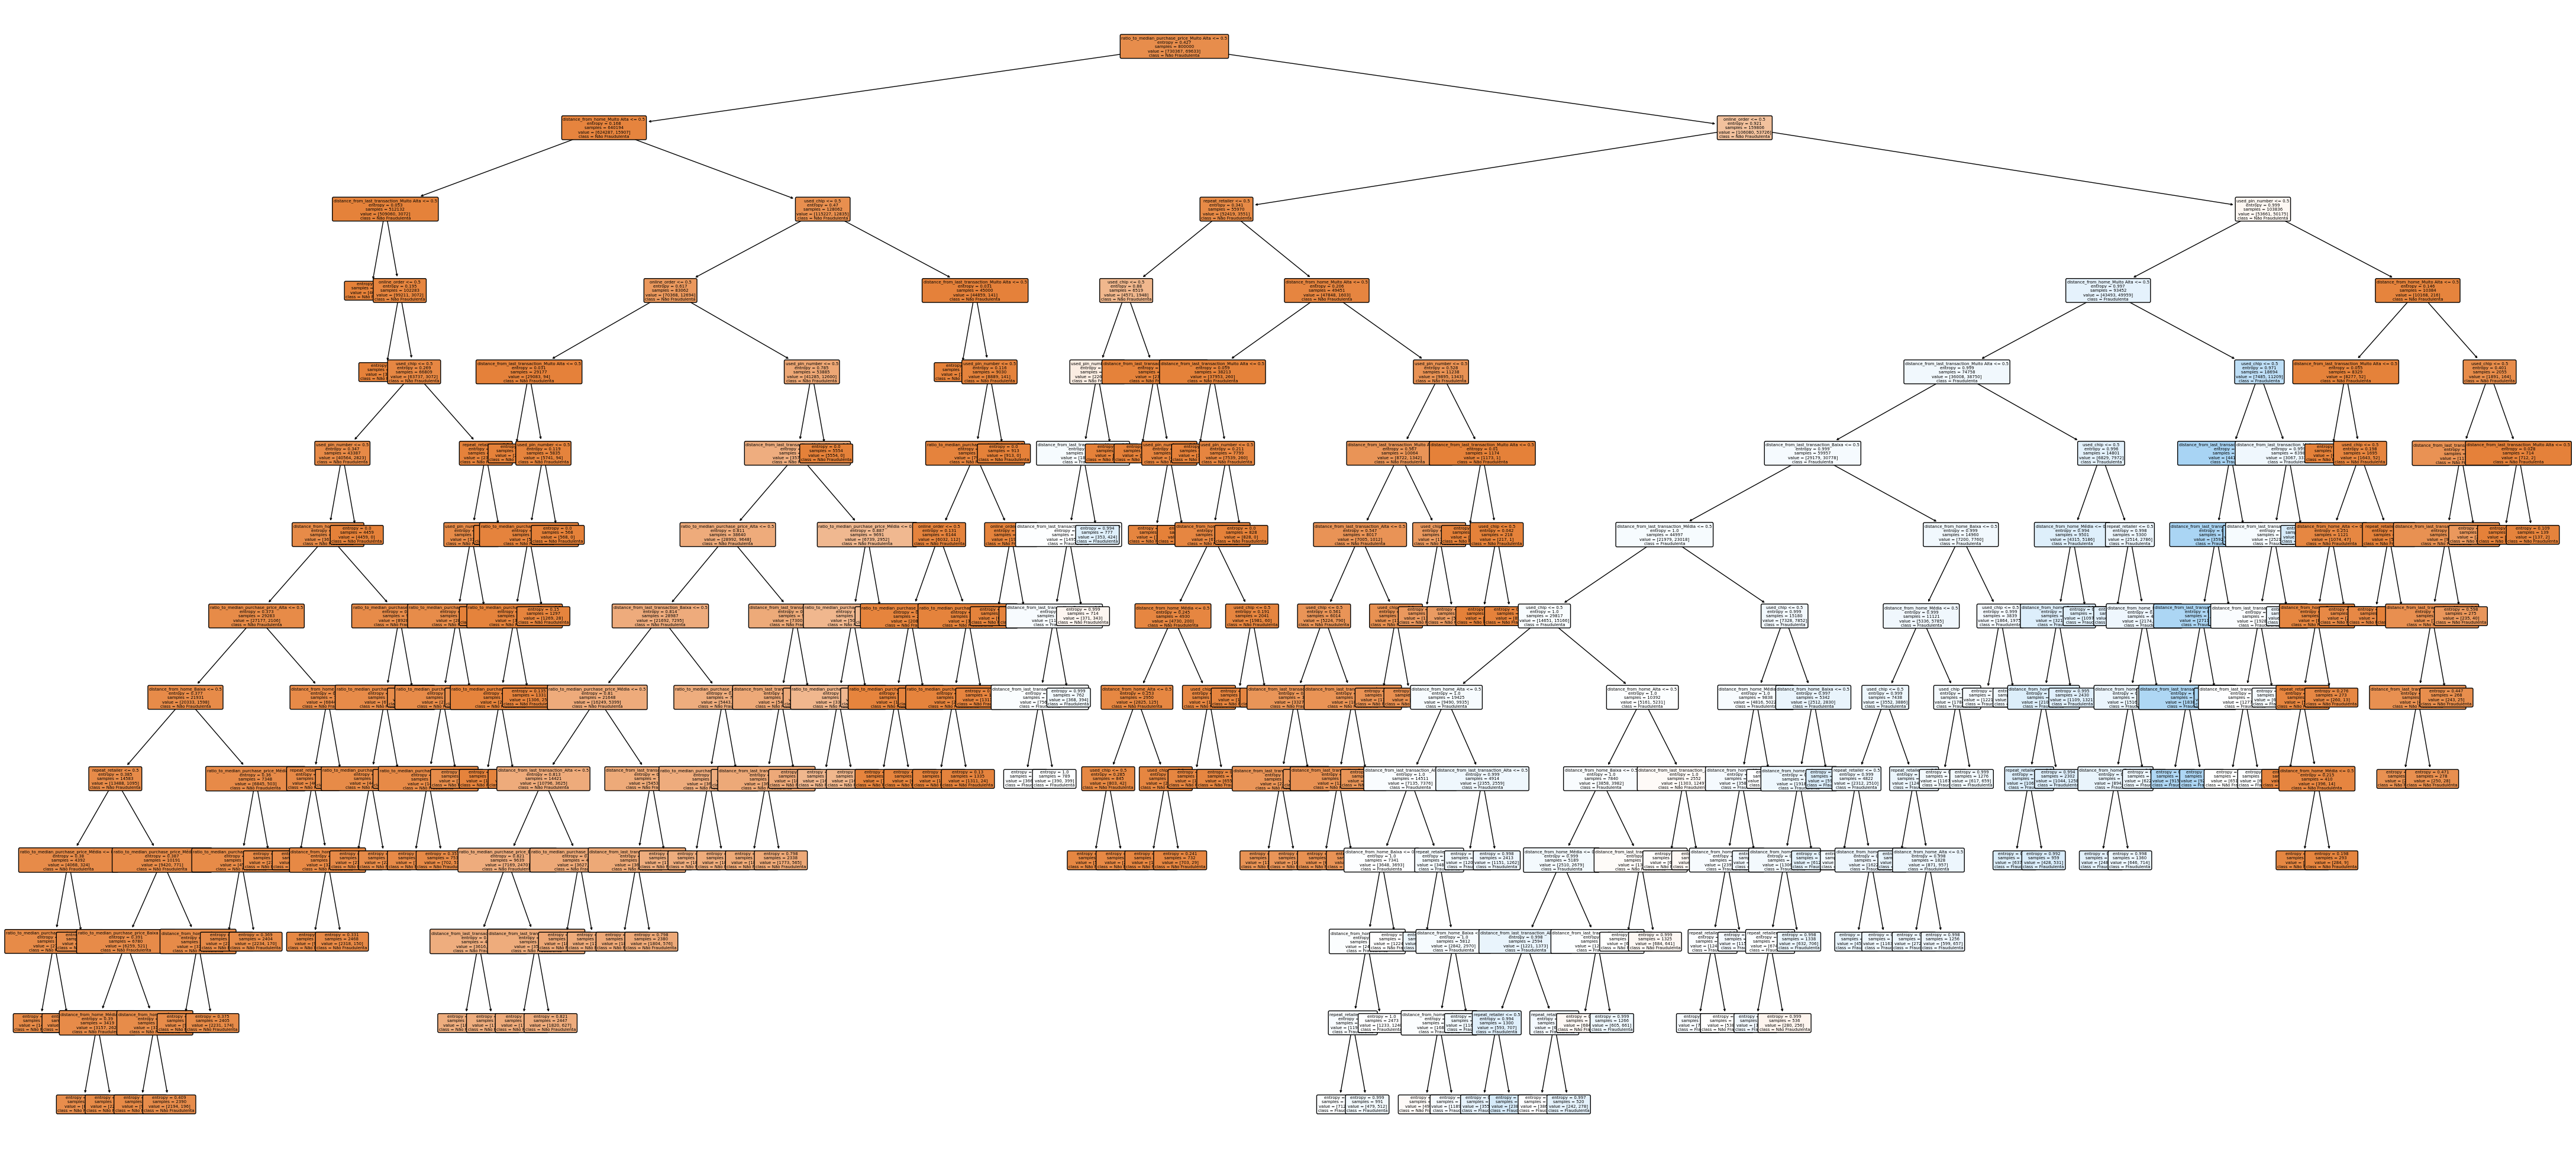

In [ ]:
plt.figure(figsize=(55, 25))
plot_tree(classifier, feature_names=X.columns, class_names=['Não Fraudulenta', 'Fraudulenta'], filled=True, rounded=True, fontsize=5)
plt.show()

Nesta etapa, é interessante analisar quais critérios foram dividindo cada nó da árvore e a separação entre a proporção de exemplos de cada classe. Fora isso, é possível observar que os nós laranjas são bem melhor definidos que os azuis, o que pode indicar a existência de nós que não são completamente homogêneos, não encontrando condições que separem completamente exemplos de classes diferentes. Consequentemente, pode significar melhor classificação dos exemplos da classe laranja "Não Fraudulenta" em relação aos azuis "Fraudulenta".

## Classificação


Classificação dos dados de teste usando a função *predict(...)* da classe *DecisionTreeClassifier* do módulo *sklearn.tree*.
É neste ponto que a árvore gerada é utilizada para tomada de decisão e definição das classes dos exemplos de teste. Os resultados são apresentados na seção seguir, assim como sua avaliação.



In [ ]:
# classificando os testes para posterior comparação com y_test
y_pred = classifier.predict(X_test)

## Avaliação do Modelo

Nesta última etapa é feita a avaliação do modelo gerado usando os dados de teste e mostram-se os resultados, incluindo **matriz de confusão, acurácia, precisão, revocação e medida-F**, possivelmente usando funções disponíveis no *sklearn* para cada medida individualmente. Não é permitido usar a função *classification_report(...)* do módulo *sklearn.metrics*.

Dessa forma, todos os parâmetros são calculados comparando o conjunto y de testes e os que foram preditos pelo modelo. Os valores obtidos são exibidos, assim como a matriz de confusão (a partir do mapa de calor da biblioteca *seaborn*). As conclusões acerca dos resultados obtidos na avaliação e do modelo em si são exibidas a seguir.

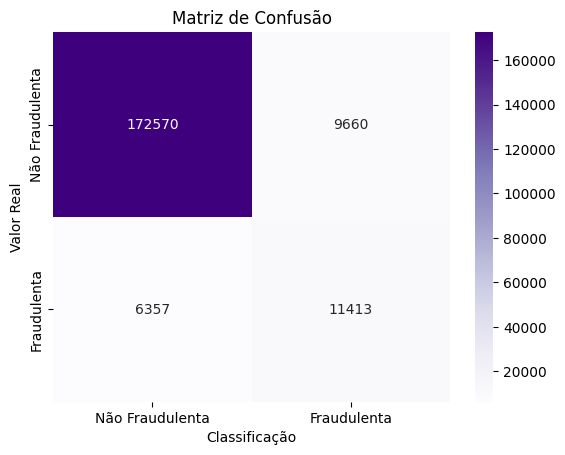

Acurácia: 0.92
Precisão: 0.54
Revocação: 0.64
Medida-F: 0.59


In [ ]:
# matriz de confusão
  # cálculo
conf_matrix = confusion_matrix(y_test, y_pred)

  # visualização
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', cbar=True,
            xticklabels=['Não Fraudulenta', 'Fraudulenta'], yticklabels=['Não Fraudulenta', 'Fraudulenta'])
plt.xlabel('Classificação')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()

# acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')

# precisão
precision = precision_score(y_test, y_pred)
print(f'Precisão: {precision:.2f}')

# revocação
recall = recall_score(y_test, y_pred)
print(f'Revocação: {recall:.2f}')

# medida-F
f1 = f1_score(y_test, y_pred)
print(f'Medida-F: {f1:.2f}')

Avaliando individualmente cada um dos parâmetros, as conclusões obtidas foram:

#### **Acurácia (92%)**
Tal resultado indica que 92% dos exemplos de teste foram classificados corretamente, o que é satisfatório para o modelo.

#### **Precisão (54%)**
Proporção de VPs (verdadeiros positivos) no total de positivos (VP + FP). Neste ponto que o modelo deixa de ser tão eficiente quanto esperado, visto que, de todos os casos classificados como positivos (transações fraudulentas), apenas cerca da metade realmente era. Isso ocorreu pois a grande maioria dos exemplos do conjunto de dados eram negativos (transações não fraudulentas), acarretando desequilíbrio entre as classes e consequente favorecimento da classe majoritária para maximizar a acurácia total (que, como mostrada, é satisfatoriamente alta).

#### **Revocação (64%)**
Proporção de VPs em relação ao total de positivos reais. O valor de revocação é um pouco mais alto que o de precisão mas, ainda assim, deixa a desejar. Este indicador demonstra que, de todos os casos reais de fraude, com a utilização do modelo, cerca de 35% deles não seriam identificados, que corresponde a parcela significativa dos casos. Isso ocorre pelo mesmo motivo da baixa precisão: o desequilíbrio entre as classes.

Como a classe alvo (positiva) é minoritária, qualquer erro em sua predição (falsos negativos, FNs) terá um impacto mais significativo na revocação, pois o denominador é relativamente pequeno. Fora isso, a pequena quantidade de exemplos pode gerar dificuldade em capturar os padrões da classe alvo e generalizar seu comportamento.

#### **Medida-F (59%)**
Média harmônica dos dois parâmetros anteriores, junção dos dois para gerar uma conclusão a respeito do classificador, tendo valores maiores para classificadores melhores. Tal métrica serve como balanceador entre precisão e revocação, no entanto, devido às duas terem sofrido consequências do mesmo problema, com resultados não tão distintos, a medida não tem novas informações a adicionar.



## Conclusão

De forma geral, apesar da alta acurácia do modelo, as demais métricas indicaram a dificuldade de classificação de casos positivos, que é o objetivo do estudo. Dessa forma, o modelo não se mostra tão satisfatório, não conseguindo identificar cerca de 35% das fraudes e tendo cerca de metade das classificações de fraude como errôneas.

Isso se dá pela característica do conjunto de dados de possuir a classe alvo como sub-representada, que acarreta as dificuldades explicadas acima. Como forma de melhorar a precisão geral do modelo, as medidas que poderiam ser tomadas envolvem o balanceamento entre as classes, e poderiam ser:


*   criação artificial de exemplos da classe minoritária;
*   ponderação das classes, de modo a dar mais peso para a minoritária;
*   sub ou superamostragem, reduzindo aleatoriamente exemplos da classe majoritária ou replicando (também aleatoriamente) exemplos da classe minoritária.

Todos esses métodos melhorariam o equilíbrio das amostras, gerando um modelo mais eficiente, visto que, com o objetivo de identificar fraudes, o gerado com amostragem crua não se mostra tão satisfatório.

Por fim, é feita uma ressalva acerca da importância da utilização de métricas diversas na avaliação do modelo, haja visto que, se a acurácia fosse o único/principal método, teria havido a conclusão enganosa de grande eficácia do modelo, não levando em conta seu objetivo atual (identificação de fraudes, casos positivos).

